In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [46]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [47]:
matches.replace(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
                'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
                'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
                'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
                'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
                'Delhi Capitals'],
                ['RCB','RPS','KKR','KXIP','DD','SRH','MI','GL','RR',
                 'CSK','DC(Deccan Chargers)','PW','KTK','RPS','DC(Delhi Capitals)'],inplace = True)

In [48]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [49]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [50]:
deliveries.replace(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
                    'Rising Pune Supergiant', 'Mumbai Indians',
                    'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
                    'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
                    'Rising Pune Supergiants', 'Delhi Capitals'],
                    ['RCB','SRH','RPS','MI','KKR','GL','KXIP','DD(Delhi Daredevils)','CSK',
                    'RR','DD(Deccan Chargers)','KTK','PW','RPS','DC'],inplace = True)

In [51]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [52]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [53]:
deliveries.duplicated().sum()

23

In [54]:
deliveries.drop_duplicates(inplace = True)

In [55]:
matches.dropna()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
636,7894,2018,Mumbai,07/04/18,MI,CSK,CSK,field,normal,0,CSK,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,DD,KXIP,KXIP,field,normal,0,KXIP,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,RCB,KKR,KKR,field,normal,0,KKR,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,RR,SRH,SRH,field,normal,0,SRH,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,KKR,CSK,CSK,field,normal,0,CSK,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,2019,Mohali,05/05/19,CSK,KXIP,KXIP,field,normal,0,KXIP,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,KKR,MI,MI,field,normal,0,MI,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,CSK,MI,CSK,bat,normal,0,MI,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
754,11414,2019,Visakhapatnam,10/05/19,DC(Delhi Capitals),CSK,CSK,field,normal,0,CSK,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [56]:
merge = pd.merge(deliveries,matches, left_on = 'match_id', right_on = 'id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [57]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179054
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [58]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948,1801.169758,2013.443869,0.017916,13.404490,3.261517
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470,3471.116142,3.363623,0.132648,23.261916,3.347058
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [59]:
matches.id.is_unique

True

In [60]:
matches.set_index('id', inplace = True)

In [61]:
matches.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,14,14,14,2,3,NaN,14,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2011-04-17,MI,RCB,MI,field,normal,NaN,MI,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

## From data we found that:
* city has missing values
* team1 and team2 columns have 14 distinct values but winner has distinct values
* umpire1 and umpire2 have 1 missing value each
* umpire3 has 94% missing values
* city has 33 distinct values while venue has 35 distinct values

In [62]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


So, we can missing values with Dubai

In [63]:
matches.city = matches.city.fillna('Dubai')

## umpire1 and umpire2 columns have one missing value each

In [64]:
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,SRH,DC(Delhi Capitals),DC(Delhi Capitals),field,normal,0,DC(Delhi Capitals),0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [65]:
matches = matches.drop('umpire3', axis =1)

In [66]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df.head()

season
city      venue                               
Abu Dhabi Sheikh Zayed Stadium               7
Ahmedabad Sardar Patel Stadium, Motera      12
Bangalore M Chinnaswamy Stadium             66
Bengaluru M Chinnaswamy Stadium              7
          M. Chinnaswamy Stadium             7

# Observations
* Bangalore and Bengaluru both are data when they are same. so we need to keep one of them.


# EDA

Text(0, 0.5, 'season')

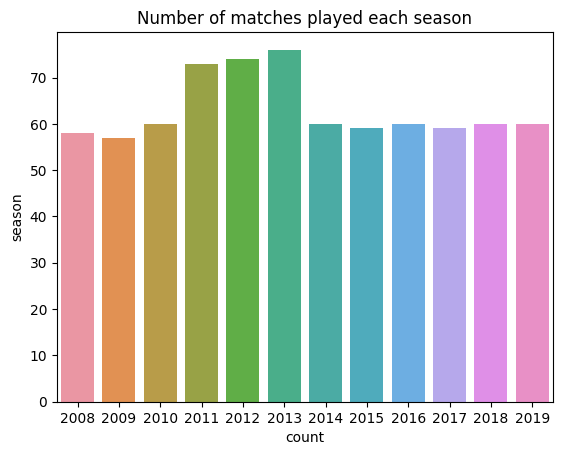

In [67]:
sns.countplot(x = 'season', data = matches)
plt.title('Number of matches played each season',)
plt.xlabel('count')
plt.ylabel('season')


Text(0, 0.5, 'count of teams')

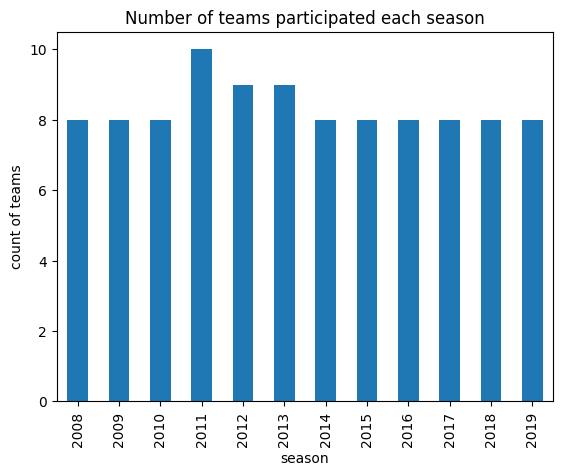

In [68]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar')
plt.title('Number of teams participated each season')
plt.xlabel('season')
plt.ylabel('count of teams')

# venue which has hosted most number pf IPL matches

Text(0, 0.5, 'Venue')

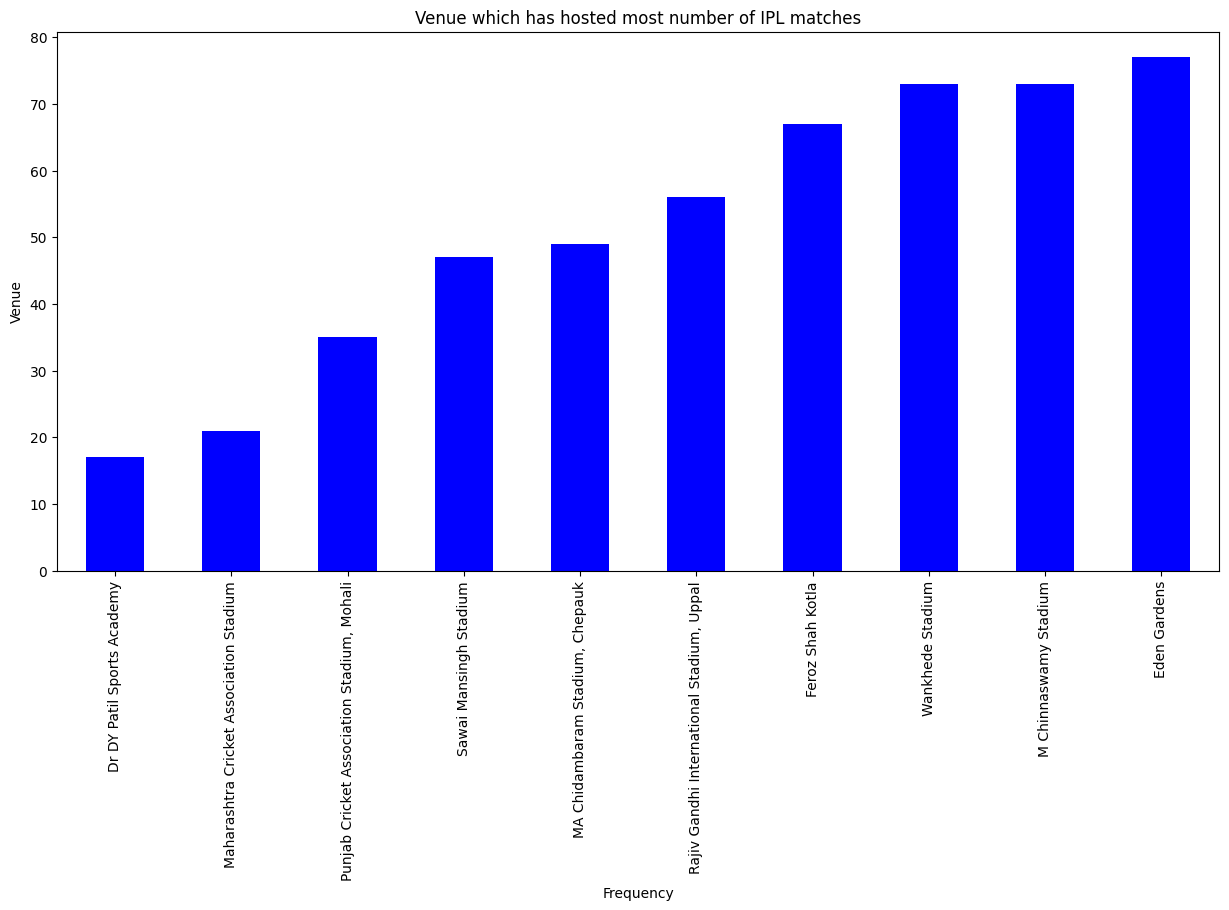

In [69]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'bar', figsize = (15,7), color = 'blue')
plt.title('Venue which has hosted most number of IPL matches')
plt.xlabel('Frequency')
plt.ylabel('Venue')

# Which team has maximum wins in IPL so far?

In [70]:
winning_teams = matches[['season','winner']]

In [71]:
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

Text(0, 0.5, 'Teams')

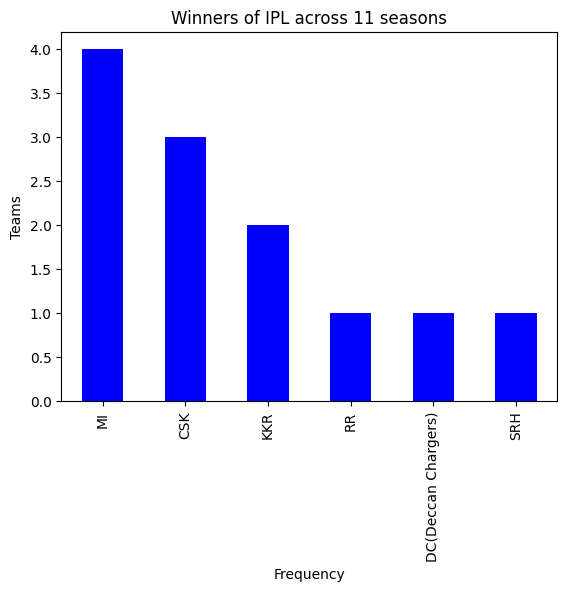

In [72]:
winners_of_IPL['team'].value_counts().plot(kind = 'bar', color = 'blue')
plt.title('Winners of IPL across 11 seasons')
plt.xlabel('Frequency')
plt.ylabel('Teams')

# Does teams choosed to bat or field first after winning toss?

Text(0.5, 1.0, 'Decision taken by captains after winnig tosses')

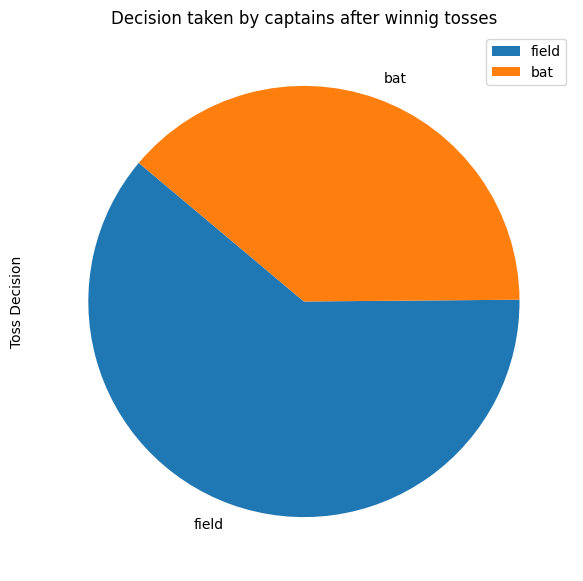

In [73]:
matches['toss_decision'].value_counts().plot(kind = 'pie', figsize = (15,7), startangle = 140, legend = True)
plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winnig tosses')

# How toss decision affects match results?


Text(0, 0.5, 'Frequency')

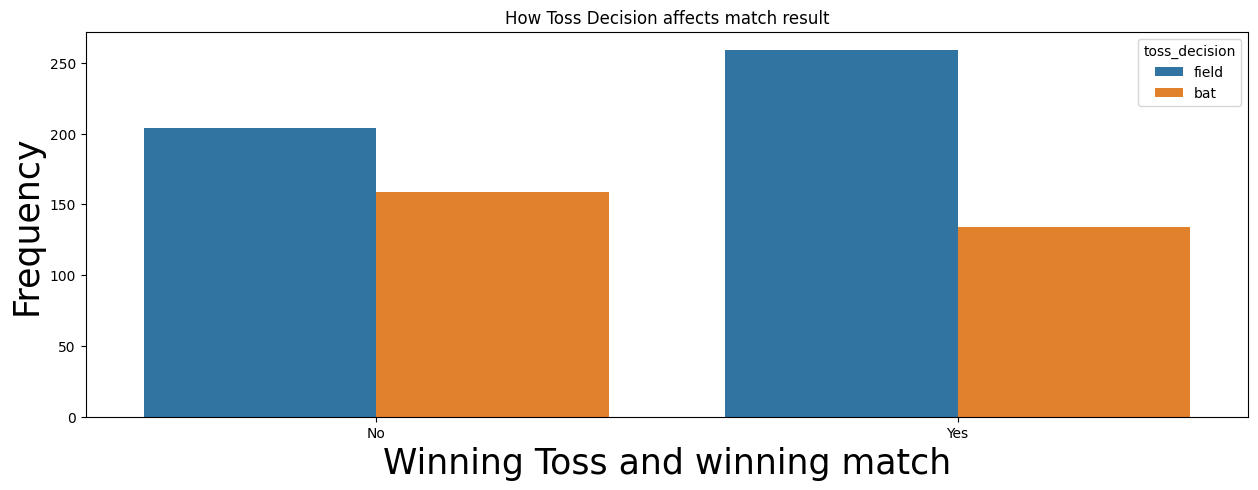

In [74]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot(x = 'toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result")
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

# Individual teams decision to choose bat or field after winning toss.

Text(0, 0.5, 'Count')

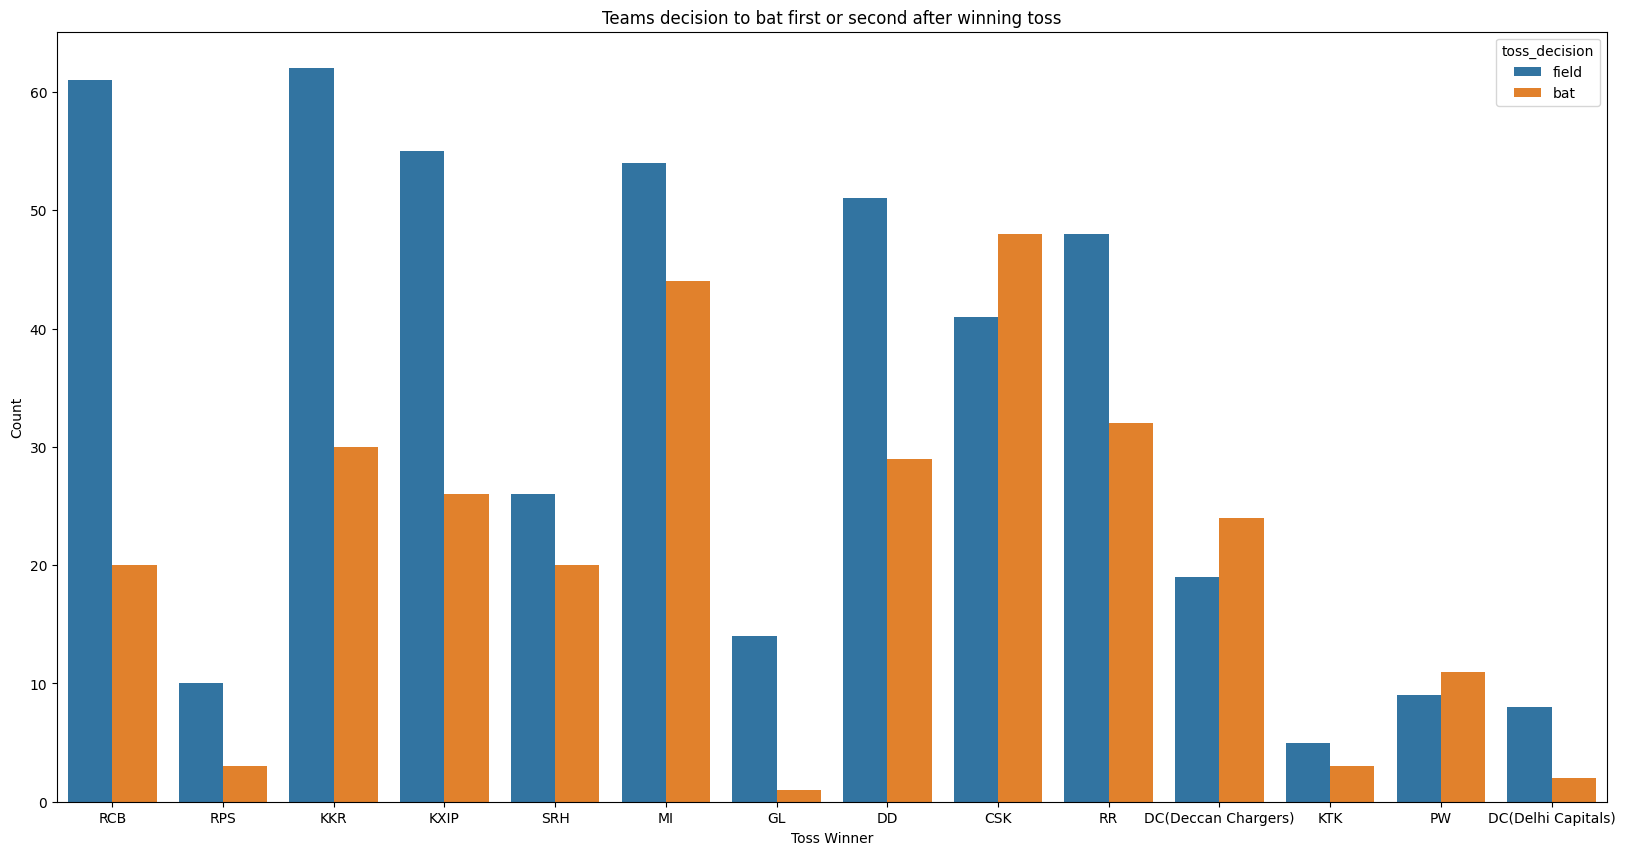

In [75]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'toss_winner', data = matches, hue = 'toss_decision')
plt.title('Teams decision to bat first or second after winning toss')
plt.xlabel('Toss Winner')
plt.ylabel('Count')

# Which player's performance has mostly led team's win?


Text(0, 0.5, 'Frequency')

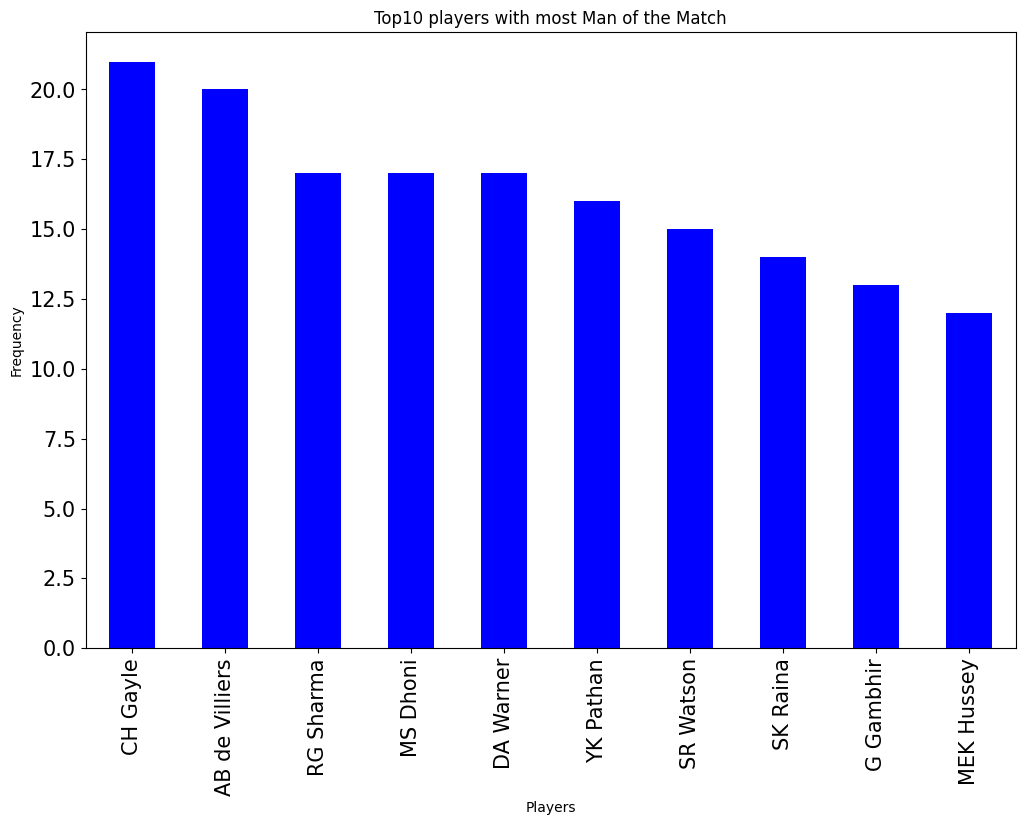

In [76]:
mom= matches['player_of_match'].value_counts()
mom.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='blue')
plt.title('Top10 players with most Man of the Match')
plt.xlabel('Players')
plt.ylabel('Frequency')

# How winning matches by fielding first varies across venues?

C:\Users\PRIYANK GOSWAMI\AppData\Local\Temp\ipykernel_8168\1174877249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')


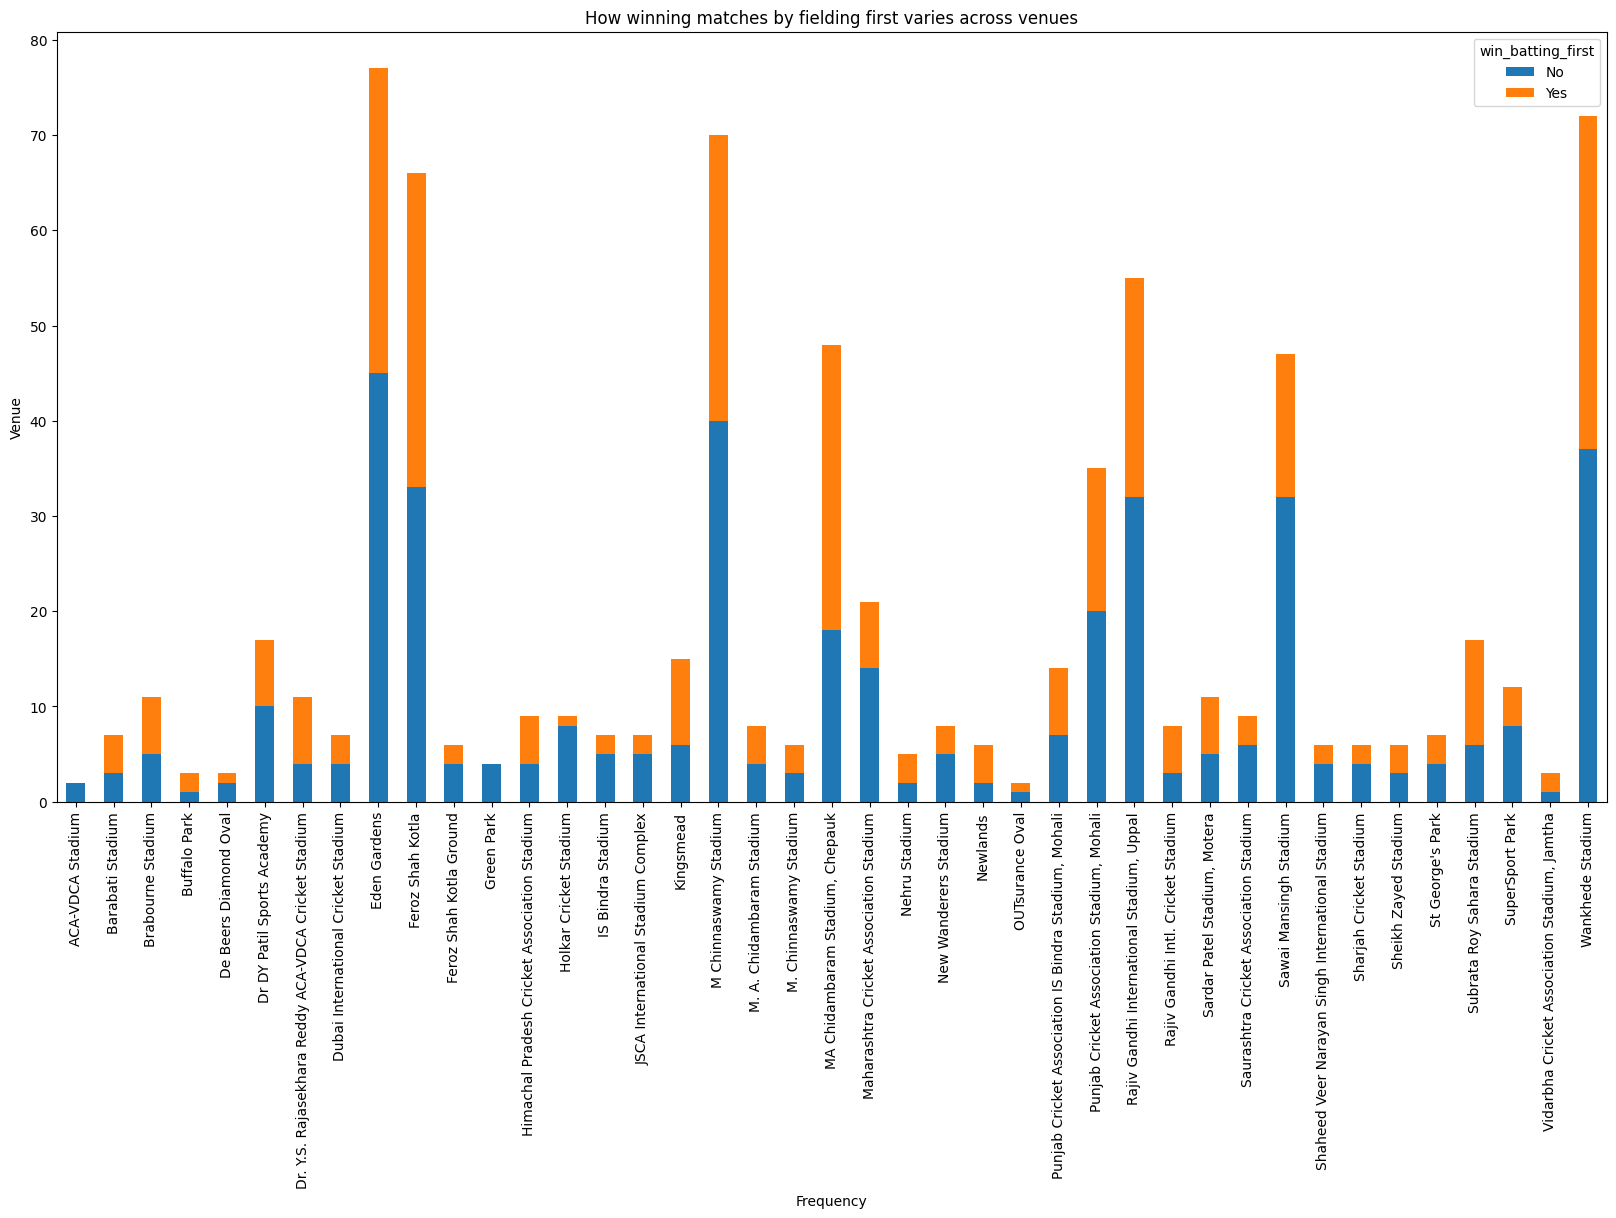

In [77]:
new_matches = matches[matches['result'] == 'normal']
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title('How winning matches by fielding first varies across venues')
plt.xlabel('Frequency')
plt.ylabel('Venue')
plt.show()

# Is batting second is an advantage?


Text(0, 0.5, 'count')

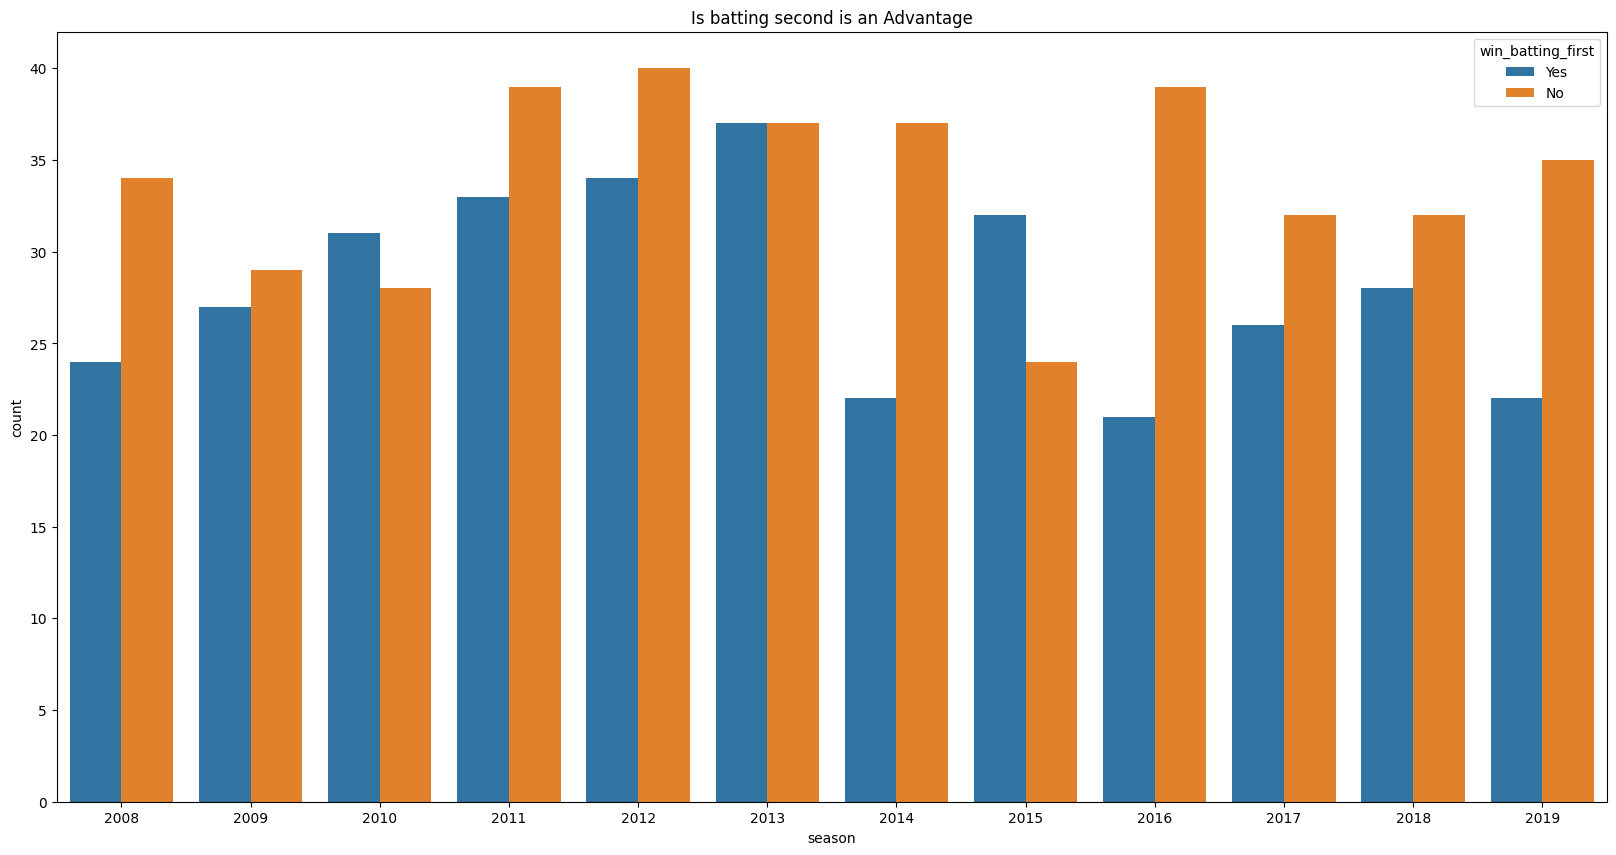

In [78]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'season', data = new_matches, hue = 'win_batting_first')
plt.title('Is batting second is an Advantage')
plt.xlabel('season')
plt.ylabel('count')

# Teams total scoring runs over the years

Text(0, 0.5, 'Total runs scored')

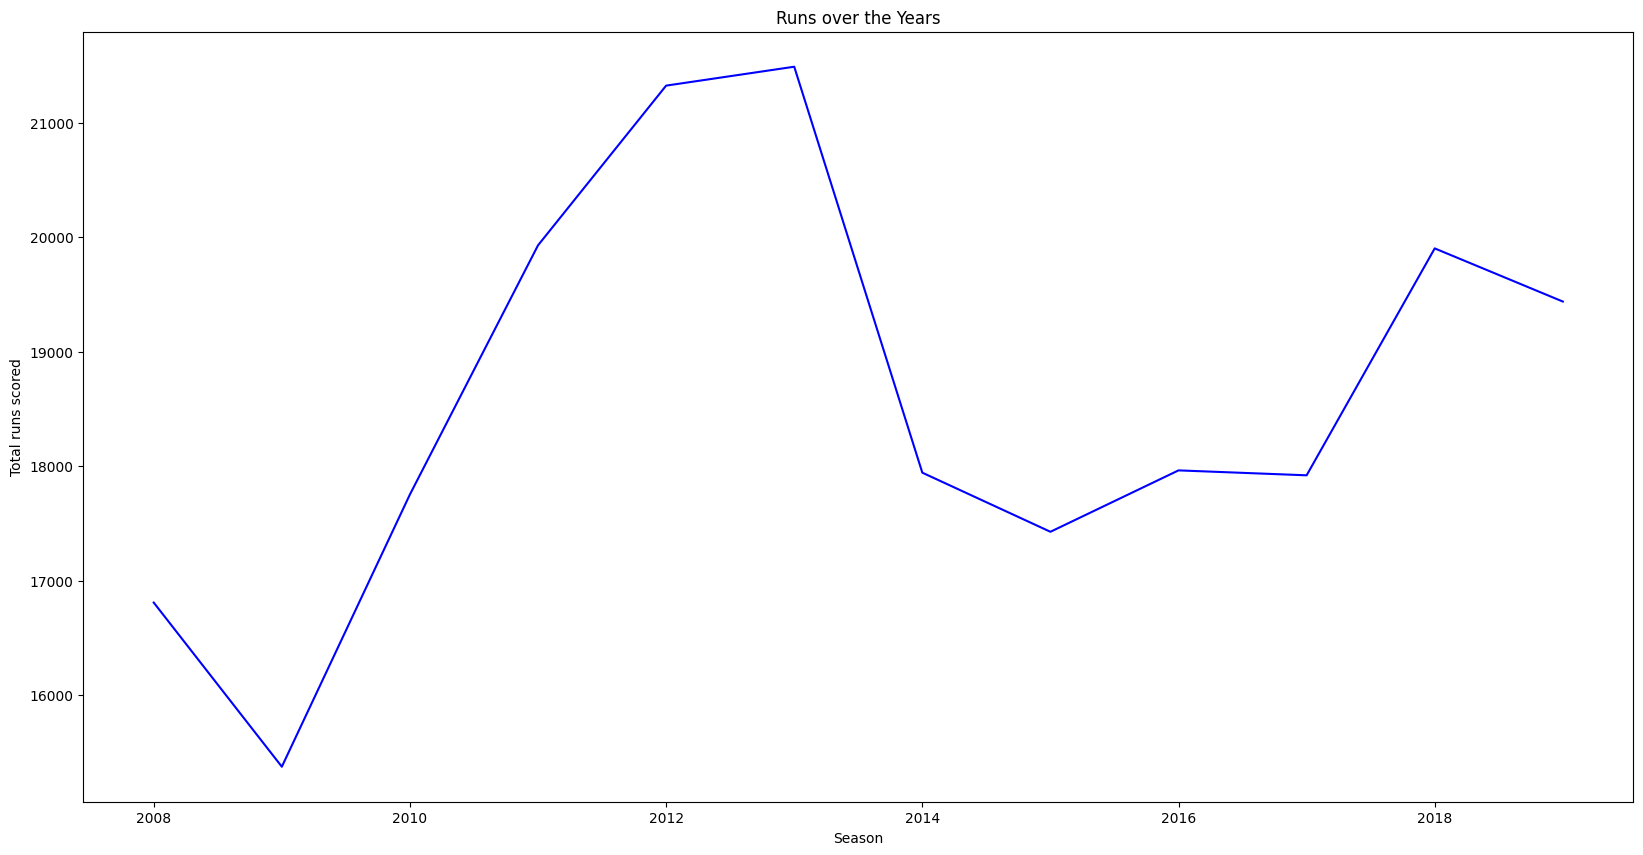

In [79]:
plt.figure(figsize = (20,10))
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', color = 'blue')
plt.title('Runs over the Years')
plt.xlabel('Season')
plt.ylabel('Total runs scored')

# Top runs

Text(0, 0.5, 'Total Runs')

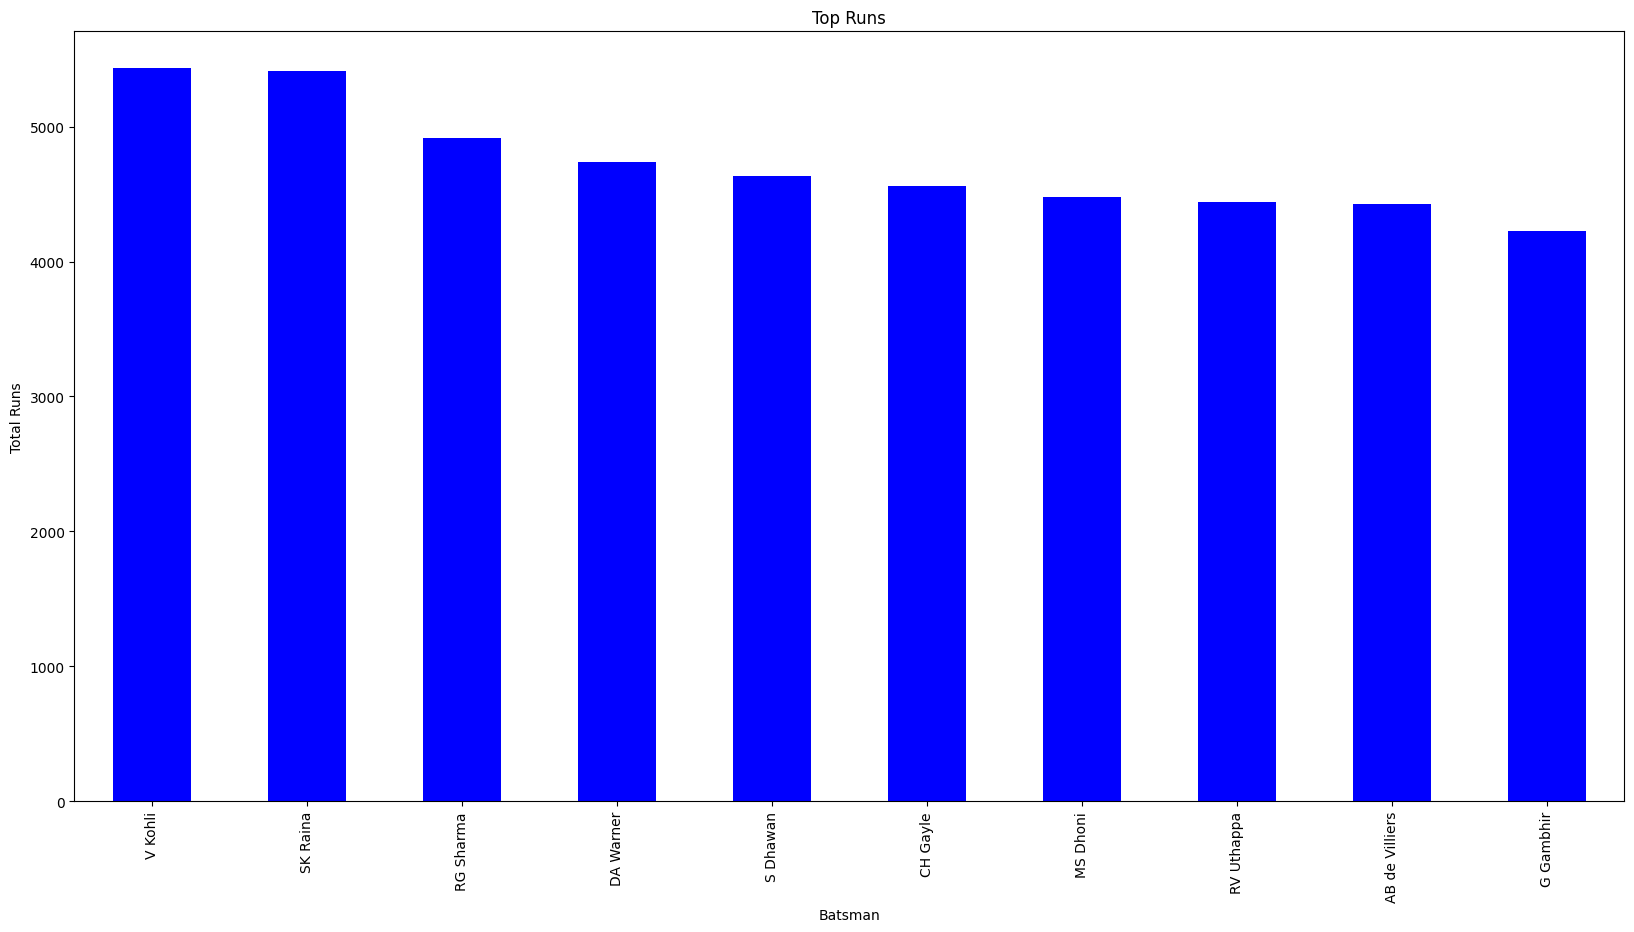

In [80]:
plt.figure(figsize = (20,10))
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'blue')
plt.title('Top Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')

# Which bowlers have performed best

Text(0, 0.5, 'Total wickets Taken')

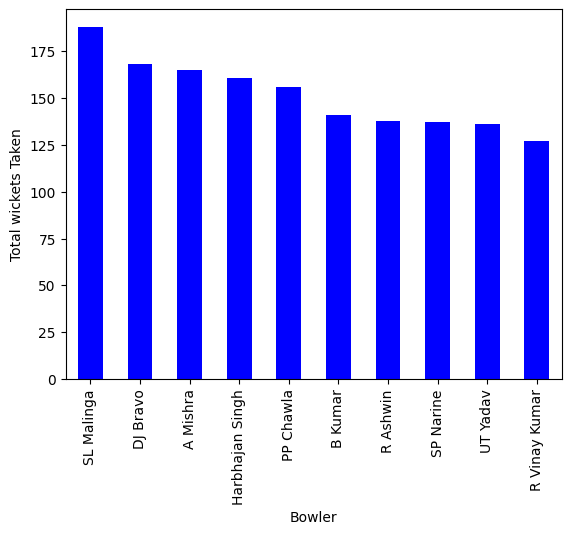

In [81]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'blue')
plt.xlabel('Bowler')
plt.ylabel('Total wickets Taken')

In [86]:
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count())
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique())

strike_rate = pd.DataFrame({'ball': no_of_balls['ball'], 'run': runs['batsman_runs'], 'season':seasons['season']})
strike_rate.reset_index(inplace = True)

strike_rate['strike_rate'] = strike_rate['run']/strike_rate['ball']*100
top_strike_rate = strike_rate[strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',ascending = False)

top_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.997726
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


Text(0, 0.5, 'Strike Rate')

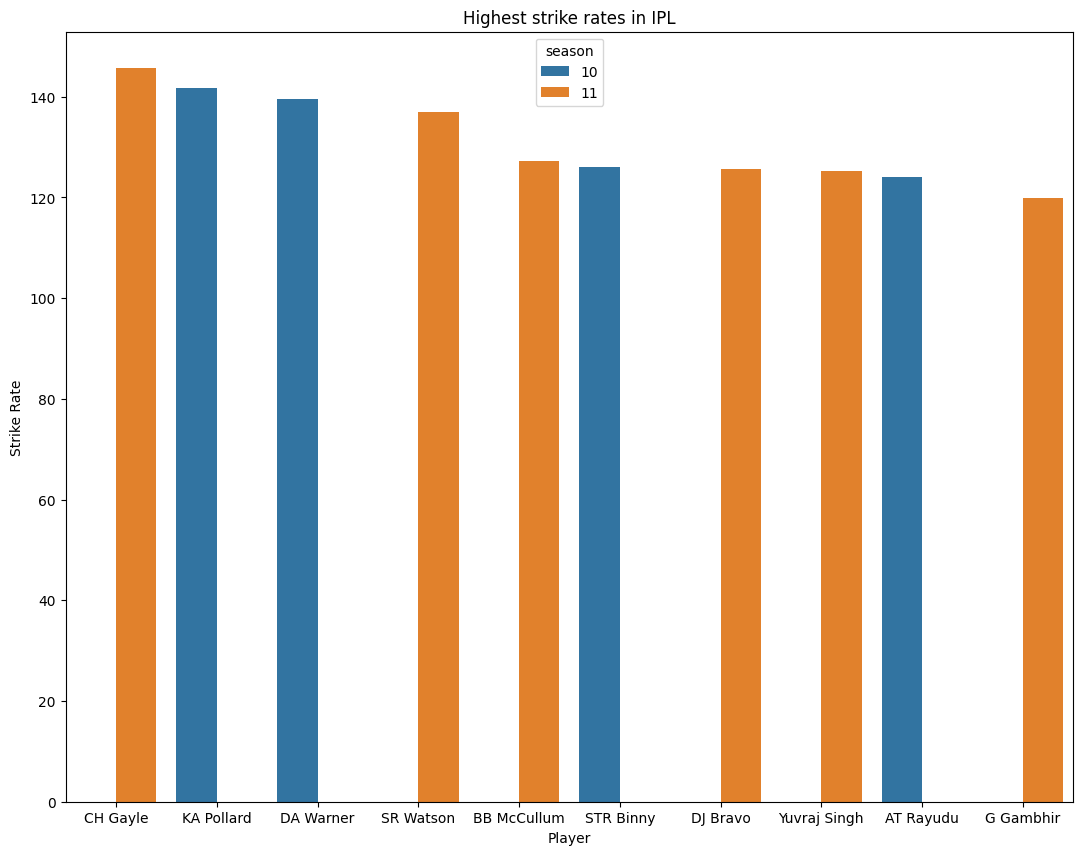

In [91]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'batsman', y = 'strike_rate', data = top_strike_rate.head(10), hue = 'season')
plt.title('Highest strike rates in IPL')
plt.xlabel('Player')
plt.ylabel('Strike Rate')

# Bowlers with maximum numbers of extras

Text(0, 0.5, 'Balls')

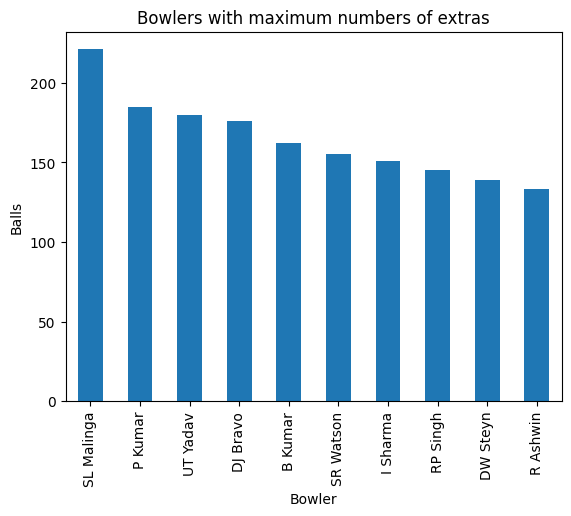

In [93]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind = 'bar')
plt.title('Bowlers with maximum numbers of extras')
plt.xlabel('Bowler')
plt.ylabel('Balls')

Q1 - As a sports analysts, The most sucessful teams, players and factors contributing win or loss of a team?
* Mumbai Indians is the most sucessful team in IPL and has won the most number of toss.
* There were more matches won by chasing the total than defending.
* When defending a total, the biggest victory was by 146 runs.
* when chasing a target, the biggest victory was by 10 wickets and there were 11 such instances.
* The Mumbai city has hosted the most number of IPL matches. 
* Chris Gayle has won the maximum number of player of the match title.
* Sundaram Ravi has officiated the most number of IPL matches on-field.
* Eden Gardens has hosted the maximum number of IPL matches.
* If a team wins a toss choose to field first as it has highest probability of winning.

Q2 - Teams or Players a company should endorse for its products?
* If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...
* If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
* If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
* If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum
* If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
* If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
* If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla
* If the franchise need a bowler with good economy then go for DW Steyn ,M Muralitharan ,R Ashwin,SP Narine ,Harbhajan Singh
 